In [2]:
!pip install mediapipe

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 32.8 MB 1.7 MB/s 


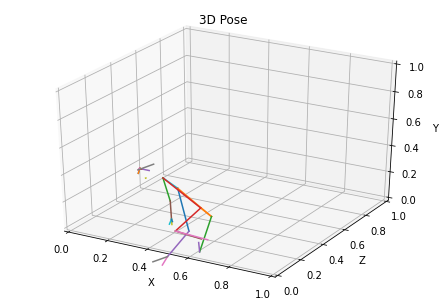

In [4]:
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
import matplotlib.image as mpimg
from google.colab.patches import cv2_imshow

mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose
mp_drawing_styles = mp.solutions.drawing_styles

EDGES = [(0,1),(1,2),(2,3),(3,7),(0,4),(4,5),(5,6),(6,8),(9,10),
         (11,12),(11,13),(13,15),(15,17),(15,19),(12,14),(14,16),(16,18),(16,20),(16,22),
         (11,23),(12,24),(23,24),(23,25),(25,27),(27,29),(27,31),(24,26),(26,28),(26,30)]


paths=["dj.jpg"]
with mp_pose.Pose(
    static_image_mode=True,
    model_complexity=1,
    enable_segmentation=True,
    min_detection_confidence=0.6) as pose:
    for path in paths:

        fig = plt.figure()
        ax = p3.Axes3D(fig)

        ax.set_xlim3d([0.0, 1.0])
        ax.set_xlabel('X')

        ax.set_ylim3d([0.0, 1.0])
        ax.set_ylabel('Z')

        ax.set_zlim3d([0.0, 1.0])
        ax.set_zlabel('Y')

        ax.set_title('3D Pose')

        image = cv2.imread(path)
        results = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        mp_drawing.draw_landmarks(
            image,
            results.pose_landmarks,
            mp_pose.POSE_CONNECTIONS,
            landmark_drawing_spec=mp_drawing_styles.get_default_pose_landmarks_style())
        cv2.imwrite("pose_{}".format(path),image)
        a=0.5
        for i in range(33):
          for e in EDGES:
            if i == e[0] and results.pose_landmarks.landmark[i].visibility>0.2:
              ax.plot([results.pose_landmarks.landmark[i].x,results.pose_landmarks.landmark[e[1]].x],
                      [a*results.pose_landmarks.landmark[i].z,a*results.pose_landmarks.landmark[e[1]].z],
                      [1-results.pose_landmarks.landmark[i].y,1-results.pose_landmarks.landmark[e[1]].y])

        plt.show()